In [1]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
from ficus import FigureManager
from matplotlib.dates import DateFormatter

import asyncio
import datetime

from dashboard.devices import discover_devices

In [25]:
start = datetime.datetime(year=2021, month=9, day=18)
end = start + datetime.timedelta(hours=1)

In [29]:
pd.DataFrame([row for row in energy_table.find({'read_time': {'$lt': end, '$gt': start}})])

,_id,device_id,read_time,slot_id,current_ma,voltage_mv,power_mw,total_wh
0,61458e70b7eaff71d1a31994,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-18 00:00:00.108,4.0,583.0,120980.0,68087,1161
1,61458e70b7eaff71d1a31995,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-18 00:00:00.371,5.0,1077.0,120972.0,128180,13342
2,61458e71b7eaff71d1a31996,00:5F:67:96:4A:DF,2021-09-18 00:00:01.021,NaN,1925.0,121191.0,217663,18387
3,61458e71b7eaff71d1a31997,90:9A:4A:D9:B4:FE,2021-09-18 00:00:01.048,NaN,1178.0,119473.0,132951,22047
4,61458e71b7eaff71d1a31998,e8:48:b8:5d:59:e2,2021-09-18 00:00:01.071,NaN,NaN,NaN,0,10
...,...,...,...,...,...,...,...,...
16753,61459c7fb7eaff71d1a35b05,e8:48:b8:5d:59:e2,2021-09-18 00:59:59.057,NaN,NaN,NaN,10800,21
16754,61459c7fb7eaff71d1a35b06,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-18 00:59:59.158,0.0,0.0,121078.0,0,57
16755,61459c7fb7eaff71d1a35b07,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-18 00:59:59.315,1.0,0.0,121078.0,0,24
16756,61459c7fb7eaff71d1a35b08,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-18 00:59:59.483,2.0,105.0,121148.0,6968,772


In [15]:
client = MongoClient('mongodb://localhost:27017/')
db = client['dashboardDB']

In [16]:
energy_table = db['realtime']
device_table = db['devices']

In [17]:
edf = pd.DataFrame([d for d in energy_table.find()])
ddf = pd.DataFrame(list(device_table.find()))
edf.fillna(0, inplace=True)
edf['power_W'] = edf['power_mw'] / 1000

In [18]:
edf

,_id,device_id,read_time,current_ma,voltage_mv,power_mw,total_wh,slot_id,power_W
0,614512629686903a21a23a09,90:9A:4A:D9:B4:FE,2021-09-17 15:10:42.029,1194.0,120422.0,131436,20863,0.0,131.436
1,614512629686903a21a23a0a,00:5F:67:96:4A:DF,2021-09-17 15:10:42.071,59.0,121751.0,7123,16460,0.0,7.123
2,614512629686903a21a23a0b,e8:48:b8:5d:59:e2,2021-09-17 15:10:42.147,0.0,0.0,0,7,0.0,0.000
3,614512629686903a21a23a0c,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 15:10:42.262,0.0,121985.0,0,46,0.0,0.000
4,614512629686903a21a23a0d,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 15:10:42.337,0.0,121983.0,0,24,1.0,0.000
...,...,...,...,...,...,...,...,...,...
1066946,61496f13b7eaff71d1b25893,e8:48:b8:5d:59:e2,2021-09-20 22:35:15.050,0.0,0.0,10800,55,0.0,10.800
1066947,61496f13b7eaff71d1b25894,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-20 22:35:15.128,0.0,121031.0,0,67,0.0,0.000
1066948,61496f13b7eaff71d1b25895,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-20 22:35:15.284,0.0,121031.0,0,24,1.0,0.000
1066949,61496f13b7eaff71d1b25896,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-20 22:35:15.453,111.0,121211.0,7068,1275,2.0,7.068


In [327]:
ddf.head()

,_id,alias,host,device_id,device_type,location,model,class,last_updated
0,614511a0bbb638e1c8b15f0b,Kitchen Fridge,192.168.0.109,00:5F:67:96:4A:DF,Plug,"{'latitude': 385547, 'longitude': -1217372}",KP115(US),<class 'kasa.smartplug.SmartPlug'>,2021-09-17 21:22:10.323
1,614511a0bbb638e1c8b15f0d,galactica,192.168.0.154,90:9A:4A:D9:B4:FE,Plug,"{'latitude': 385547, 'longitude': -1217372}",KP115(US),<class 'kasa.smartplug.SmartPlug'>,2021-09-17 21:22:10.323
2,61451261bbb638e1c8b15f3c,Desk: Camille,192.168.0.173,e8:48:b8:5d:59:e2,Bulb,"{'latitude': 385548, 'longitude': -1217373}",KL125(US),<class 'kasa.smartbulb.SmartBulb'>,2021-09-17 21:22:10.323
3,61451261bbb638e1c8b15f3e,Misc,192.168.0.132,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,Plug,"{'latitude': 385548, 'longitude': -1217373}",Socket for HS300(US),<class 'kasa.smartstrip.SmartStripPlug'>,2021-09-17 21:22:10.323
4,61451261bbb638e1c8b15f40,Misc,192.168.0.132,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,Plug,"{'latitude': 385548, 'longitude': -1217373}",Socket for HS300(US),<class 'kasa.smartstrip.SmartStripPlug'>,2021-09-17 21:22:10.323


In [328]:
energy = pd.merge(edf, ddf, on='device_id', how='left')

In [329]:
device_means = energy.groupby(by='alias').mean()
drop_devices = device_means[device_means.power_W < 5].reset_index().alias

In [330]:
energy = energy[energy.alias.isin(drop_devices) == False]

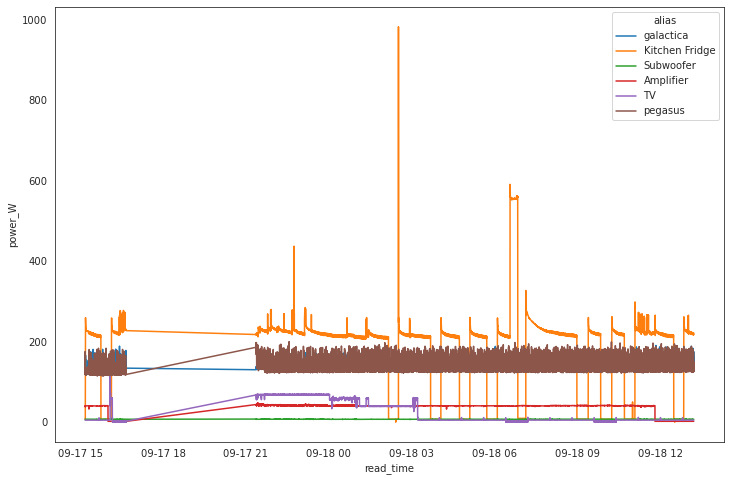

In [280]:
with sns.axes_style("white"), \
     FigureManager(show=True, figsize=(12,8)) as (fig, ax):
        
    sns.lineplot(data=energy, x='read_time', y='power_W', hue='alias', legend=True, ax=ax)

In [233]:
start, end = energy.read_time.min().floor('2s'), energy.read_time.max().floor('2s')

In [236]:
pd.date_range(start=start, end=end, freq='2s')

DatetimeIndex(['2021-09-17 15:10:42', '2021-09-17 15:10:44',
               '2021-09-17 15:10:46', '2021-09-17 15:10:48',
               '2021-09-17 15:10:50', '2021-09-17 15:10:52',
               '2021-09-17 15:10:54', '2021-09-17 15:10:56',
               '2021-09-17 15:10:58', '2021-09-17 15:11:00',
               ...
               '2021-09-18 11:27:26', '2021-09-18 11:27:28',
               '2021-09-18 11:27:30', '2021-09-18 11:27:32',
               '2021-09-18 11:27:34', '2021-09-18 11:27:36',
               '2021-09-18 11:27:38', '2021-09-18 11:27:40',
               '2021-09-18 11:27:42', '2021-09-18 11:27:44'],
              dtype='datetime64[ns]', length=36512, freq='2S')

In [240]:
peg_df = energy[energy.alias == 'pegasus']

<AxesSubplot:xlabel='read_time'>

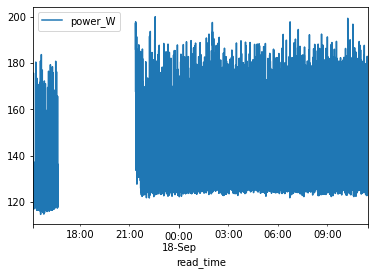

In [245]:
peg_df.resample('2S', on='read_time').mean().plot(y='power_W')

In [252]:
peg_df.resample('2S', on='read_time').mean().power_W.isna().sum()

8874

In [ ]:
peg_df.filln

In [331]:
rs_energy = energy.groupby('alias').resample('30S', on='read_time').mean().reset_index().ffill(limit=1).fillna(value=0)

In [332]:
rs_energy[rs_energy.alias == 'pegasus']

,alias,read_time,current_ma,voltage_mv,power_mw,total_wh,slot_id,power_W
43835,pegasus,2021-09-17 15:10:30,999.888889,121611.333333,119872.888889,12209.555556,5.0,119.872889
43836,pegasus,2021-09-17 15:11:00,1065.285714,121141.285714,131778.285714,12210.000000,5.0,131.778286
43837,pegasus,2021-09-17 15:11:30,1028.875000,121050.875000,123351.875000,12211.500000,5.0,123.351875
43838,pegasus,2021-09-17 15:12:00,1031.214286,121028.428571,122965.000000,12212.142857,5.0,122.965000
43839,pegasus,2021-09-17 15:12:30,1031.214286,121028.428571,122965.000000,12212.142857,5.0,122.965000
...,...,...,...,...,...,...,...,...
52597,pegasus,2021-09-20 16:11:30,1085.937500,120426.187500,131332.937500,21825.875000,5.0,131.332937
52598,pegasus,2021-09-20 16:12:00,1098.733333,120253.266667,130037.200000,21826.866667,5.0,130.037200
52599,pegasus,2021-09-20 16:12:30,1042.687500,120269.000000,124153.875000,21828.625000,5.0,124.153875
52600,pegasus,2021-09-20 16:13:00,1087.533333,120286.933333,129629.533333,21829.800000,5.0,129.629533


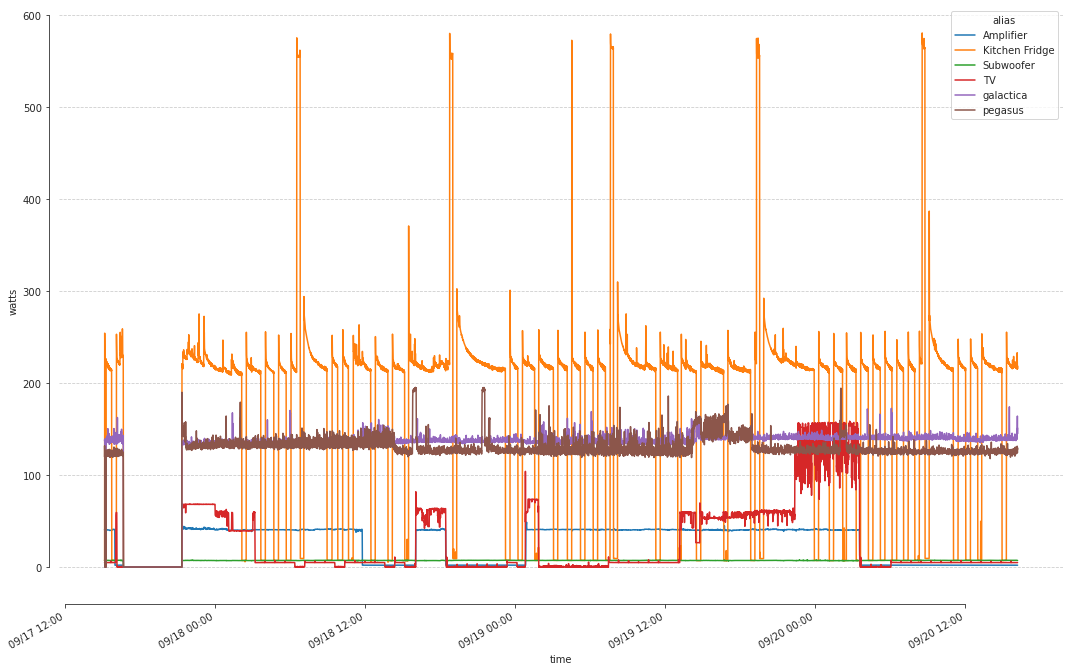

In [333]:
with sns.axes_style("ticks"), \
     FigureManager(show=True, figsize=(18,12)) as (fig, ax):
        
    sns.lineplot(data=rs_energy, x='read_time', y='power_W', hue='alias', lw=1.5, legend=True, ax=ax)
    sns.despine(fig=fig, offset=10, trim=True)
    
    ax.set_ylabel('watts')
    ax.set_xlabel('time')

    fig.autofmt_xdate()
    date_fmt = DateFormatter("%m/%d %H:%M")
    ax.xaxis.set_major_formatter(date_fmt)
    ax.yaxis.grid(ls='--')

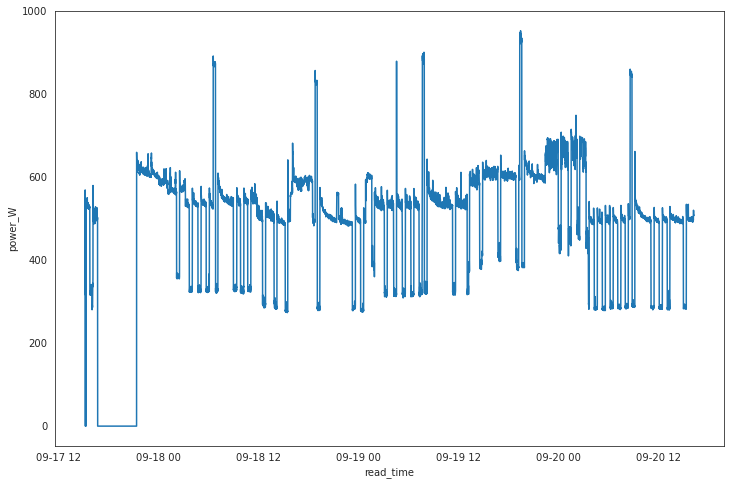

In [334]:
with sns.axes_style("white"), \
     FigureManager(show=True, figsize=(12,8)) as (fig, ax):
        
    sns.lineplot(data=rs_energy.groupby('read_time').sum().reset_index(), x='read_time', y='power_W', legend=True, ax=ax)


In [ ]:
with sns.axes_style("white"), \
     FigureManager(show=True, figsize=(12,8)) as (fig, ax):
    
    
        
    sns.lineplot(data=energy, x='read_time', y='power_W', hue='alias', legend=True, ax=ax)

In [18]:
df.tail(500)

,_id,device_id,read_time,current_ma,voltage_mv,power_mw,total_wh,slot_id
3466,6144636581da70cedbd3b9a0,00:5F:67:96:4A:DF,2021-09-17 02:44:05.037,1901,121707,215163,14670,NaN
3467,6144636581da70cedbd3b9a1,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:44:05.120,0,122204,0,46,0.0
3468,6144636581da70cedbd3b9a2,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:44:05.381,0,122166,0,24,1.0
3469,6144636581da70cedbd3b9a3,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:44:05.511,107,122313,7290,610,2.0
3470,6144636581da70cedbd3b9a4,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:44:05.716,441,122297,40582,1121,3.0
...,...,...,...,...,...,...,...,...
3961,614463db81da70cedbd3bb8f,90:9A:4A:D9:B4:FE,2021-09-17 02:46:03.020,1133,120720,136916,19212,NaN
3962,614463db81da70cedbd3bb90,00:5F:67:96:4A:DF,2021-09-17 02:46:03.037,1896,121718,215278,14677,NaN
3963,614463db81da70cedbd3bb91,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:46:03.115,0,122065,0,46,0.0
3964,614463db81da70cedbd3bb92,C0:06:C3:42:69:69_80068DB7A2D022C4075DDD1F281E...,2021-09-17 02:46:03.271,0,122065,0,24,1.0


In [55]:
import enum

class Test(enum.Enum):
    A = 'Apple'
    B = 'Banana'

In [60]:
Test.A.value

'Apple'

In [33]:
plugs, lights = await discover_devices()

In [49]:
l = list(lights.values()).pop()

In [61]:
l.children

[]

d = list(plugs.values())[0]

In [64]:
d.device_type.name

'Plug'

In [157]:
l.has_emeter

True

In [67]:
d.model

'KP115(US)'

In [43]:
d.host

'192.168.0.154'

In [70]:
d.sys_info

{'sw_ver': '1.0.17 Build 210506 Rel.075231',
 'hw_ver': '1.0',
 'model': 'KP115(US)',
 'deviceId': '800651BFE433605ECA7A02B60B4E8A841E2E36E0',
 'oemId': '9FDE0C9E37EDF4495F681216FEFB0CFB',
 'hwId': '3E2B9A976B98DCFC5C83D11C8CEF7510',
 'rssi': -47,
 'latitude_i': 385547,
 'longitude_i': -1217372,
 'alias': 'galactica',
 'status': 'new',
 'obd_src': 'tplink',
 'mic_type': 'IOT.SMARTPLUGSWITCH',
 'feature': 'TIM:ENE',
 'mac': '90:9A:4A:D9:B4:FE',
 'updating': 0,
 'led_off': 0,
 'relay_state': 1,
 'on_time': 505018,
 'icon_hash': '',
 'dev_name': 'Smart Wi-Fi Plug Mini',
 'active_mode': 'none',
 'next_action': {'type': -1},
 'ntc_state': 0,
 'err_code': 0}